# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, f1_score
from sklearn import metrics


# Loading the dataset

In [22]:
data = pd.read_csv("creditcard.csv")
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Processing the data

In [23]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(f"Total number of transactions : {Total_transactions}")
print(f'Number of Normal Transactions are : {normal}')
print(f'Number of fraudulent Transactions are {fraudulent}')
print(f'Percentage of fraud Transactions is {fraud_percentage}')

Total number of transactions : 284807
Number of Normal Transactions are : 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### no null values in the dataset

#### in the dataset all the features are transformed using PCA except Amount

In [25]:
print(f"minimum amount: {min(data.Amount)} | maximum amount: {max(data.Amount)}")

minimum amount: 0.0 | maximum amount: 25691.16


#### since there is a huge difference between minimum and maximum value of the amount, we scale this variable

In [26]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

#### we drop the time variable 

In [27]:
data.drop(['Time'], axis=1, inplace=True)

#### droping duplicate values

In [28]:
data.drop_duplicates(inplace=True)

In [29]:
data.shape

(275663, 30)

#### dropped 9144 duplicate values

#### data unbalance

<AxesSubplot:xlabel='Class', ylabel='count'>

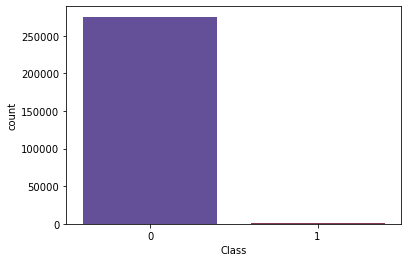

In [30]:
sns.countplot(x='Class',data=data,palette="twilight", )

#### from the recorded transactions, a very small portion is fraudulent, which suggests that the data is highly unbalanced

# Correlation between variables

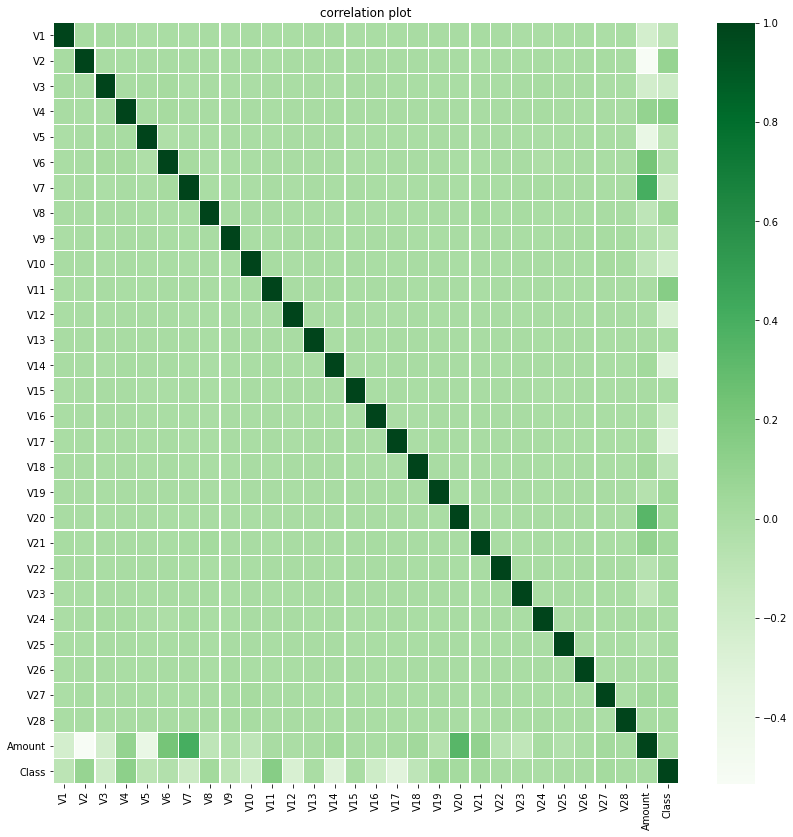

In [31]:
plt.figure(figsize = (14,14))
plt.title('correlation plot')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens")
plt.show()

# Function to plot confusion matrix

In [32]:
def display_confusion_matrix(y_test,y_pred):
    matrix = metrics.confusion_matrix(y_test,y_pred)
    matrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
    matrixDisplay.plot()
    plt.show()


# Function to get metrics of the predicted data

In [49]:
def show_metrics(ypred, ytest, model_name):
    accuracy = accuracy_score(ypred, ytest)
    mse = mean_squared_error(ypred, ytest)
    rmse = np.sqrt(mse)
    f1 = f1_score(ypred, ytest)
    dict = {'details':['model name', 'accuracy', 'mean squared error', 'root mean squared error', 'f1 score'], 'score':[model_name, accuracy, mse, rmse, f1]}
    metrics_data = pd.DataFrame(dict)
    display(metrics_data)

# Train and test split

In [34]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# Model building

### KNN

In [36]:
n = 8
model_1 = KNeighborsClassifier(n_neighbors = n)
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

In [50]:
show_metrics(y_pred_1, y_test, 'KNN')

,details,score
0,model name,KNN
1,accuracy,0.99926
2,mean squared error,0.00074
3,root mean squared error,0.027204
4,f1 score,0.78481


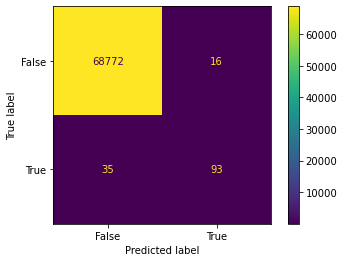

In [51]:
display_confusion_matrix(y_test,y_pred_1)

### Decision tree

In [52]:
model_2 = DecisionTreeClassifier(random_state = 0)
model_2.fit(X_train,y_train)
y_pred_2 = model_2.predict(X_test)

In [53]:
show_metrics(y_pred_2, y_test, 'Decision tree')

,details,score
0,model name,Decision tree
1,accuracy,0.998999
2,mean squared error,0.001001
3,root mean squared error,0.031642
4,f1 score,0.708861


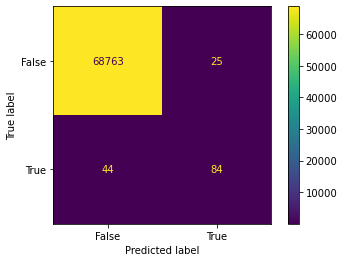

In [54]:
display_confusion_matrix(y_test,y_pred_2)

### Logistic Regression

In [55]:
model_3 = LogisticRegression()
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

In [56]:
show_metrics(y_pred_3, y_test, 'Logistic regression')

,details,score
0,model name,Logistic regression
1,accuracy,0.998955
2,mean squared error,0.001045
3,root mean squared error,0.032323
4,f1 score,0.666667


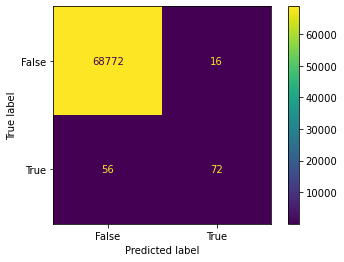

In [57]:
display_confusion_matrix(y_test, y_pred_3)

### Support Vector Machines

In [97]:
model_4 = SVC()
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)

In [98]:
show_metrics(y_pred_4, y_test, 'Support Vector Machines')

,details,score
0,model name,Support Vector Machines
1,accuracy,0.999318
2,mean squared error,0.000682
3,root mean squared error,0.026115
4,f1 score,0.781395


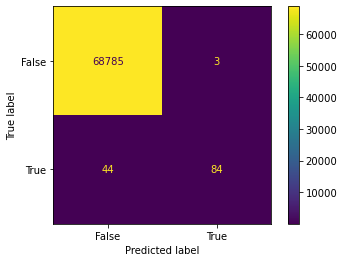

In [99]:
display_confusion_matrix(y_test, y_pred_4)

### Neural networks

In [2]:
from sklearn.neural_network import MLPClassifier

In [64]:
model_5 = MLPClassifier(hidden_layer_sizes = (6,5),
                        activation='relu',
                        solver='adam', 
                        verbose=False, 
                        random_state=45)
model_5.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(6, 5), random_state=45)

In [65]:
y_pred_5 = model_5.predict(X_test)

In [67]:
show_metrics(y_pred_5, y_test, 'Neural networks')

,details,score
0,model name,Neural networks
1,accuracy,0.999274
2,mean squared error,0.000726
3,root mean squared error,0.026935
4,f1 score,0.789916


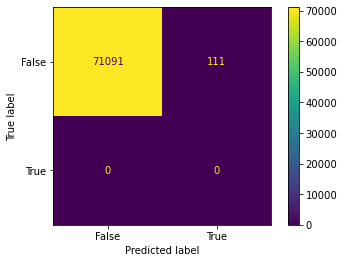

In [11]:
display_confusion_matrix(y_pred_5, y_test)

# Model comparison

In [112]:
def compare_models(y_pred, y_test):
    
    models = ['KNN', 'Decision tree', 'Logistic Regression', 'Support vector machines', 'Neural networks']
    accuracy = []
    mse = []
    rmse = []
    f1 = []
    for i in range(len(models)):
        accuracy.append(accuracy_score(y_pred[i], y_test))
        mse.append(mean_squared_error(y_pred[i], y_test))
        rmse.append(np.sqrt(mean_squared_error(y_pred[i], y_test)))
        f1.append(f1_score(y_pred[i], y_test))
    dict = {'model':models, 'accuracy':accuracy, 'mean squared error':mse, 'root mean squared error': rmse, 'f1 score':f1}
    compare_df = pd.DataFrame(dict)
    return compare_df

In [113]:
predicted_values = [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5]

In [114]:
compare_df = compare_models(predicted_values, y_test)

In [115]:
display(compare_df)

,model,accuracy,mean squared error,root mean squared error,f1 score
0,KNN,0.999260,0.000740,0.027204,0.784810
1,Decision tree,0.998999,0.001001,0.031642,0.708861
2,Logistic Regression,0.998955,0.001045,0.032323,0.666667
3,Support vector machines,0.999318,0.000682,0.026115,0.781395
4,Neural networks,0.999274,0.000726,0.026935,0.789916


# CONCLUSION

### From the above comparison dataframe, in terms of accuracy, mean squared error, root mean squared error and f1 score, Neural networks yields a better prediction when compared to the other models.